<a href="https://colab.research.google.com/github/linjiw/787/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/24787/hw5

/content/drive/MyDrive/24787/hw5


In [ ]:
def printshape(name,var):
  print(f"{name}.shape {var.shape}")
def printvalue(name,var):
  print(f"{name}:{var}")

#Q1

In [ ]:
xtrain = pd.read_csv("Xtrain.csv",header=None).to_numpy()[:,:13]

print(f"xtrain.shape {xtrain.shape}")

xtrain.shape (998, 13)


In [ ]:
test = np.delete(xtrain,np.s_[1],axis=1)
print(test.shape)

(998, 12)


In [ ]:
vif_lst = []
r2_lst = []
for i in range(13):
  X = np.delete(xtrain,np.s_[i],axis=1)
  A = np.hstack((X,np.ones((X.shape[0],1))))
  y = xtrain[:,i].reshape((-1,1))
  # clf = linear_model.LogisticRegression(penalty="l2", solver="liblinear",tol=1e-6,max_iter=int(1e6))
  # printshape('X',X)
  # printshape('y',y)
  clf = LinearRegression()

  clf.fit(X,y.ravel())
  predicted = clf.predict(X)
  r2 = r2_score(y.ravel(),predicted.ravel())
  vif = 1/(1-r2)
  # printvalue('i',i)
  # printvalue('r2',r2)
  # printvalue('vif',vif)
  vif_lst.append(vif)
  r2_lst.append(r2)
  



In [ ]:
vif_lst = np.array(vif_lst).reshape((-1,1))
# r2_lst = np.array(r2_lst).reshape((-1,1))

print(vif_lst)
# print(r2_lst)

[[1.00891239]
 [1.00864724]
 [1.01174581]
 [1.01447094]
 [1.00648781]
 [1.01433373]
 [1.01307942]
 [1.01514812]
 [1.01117178]
 [1.01040757]
 [1.01080574]
 [1.01171272]
 [1.00941915]]


#Q2

##(a)

In [ ]:
def gini(val):
  ans = 1
  
  ans -= val**2
  ans -= (1-val)**2
  return ans

In [ ]:
P_x = 1/3 
P_y = 2/3
P_x_y = 1/2
P_y_x = 1
P_xy = 1/3

In [ ]:
H_x = gini(P_x)
H_y = gini(P_y)
# H_x_y = gini(P_x_y)
# H_y_x = gini(P_y_x)

In [ ]:
printvalue('H(x) = ', H_x)
printvalue('H(y) = ', H_y)
# printvalue('H(x|y) = ', H_x_y)
# printvalue('H(y|x) = ', H_y_x)

H(x) = :0.4444444444444443
H(y) = :0.4444444444444444


We can also right P(x), P(y) P(X|y), P(Y|X) in this form. 

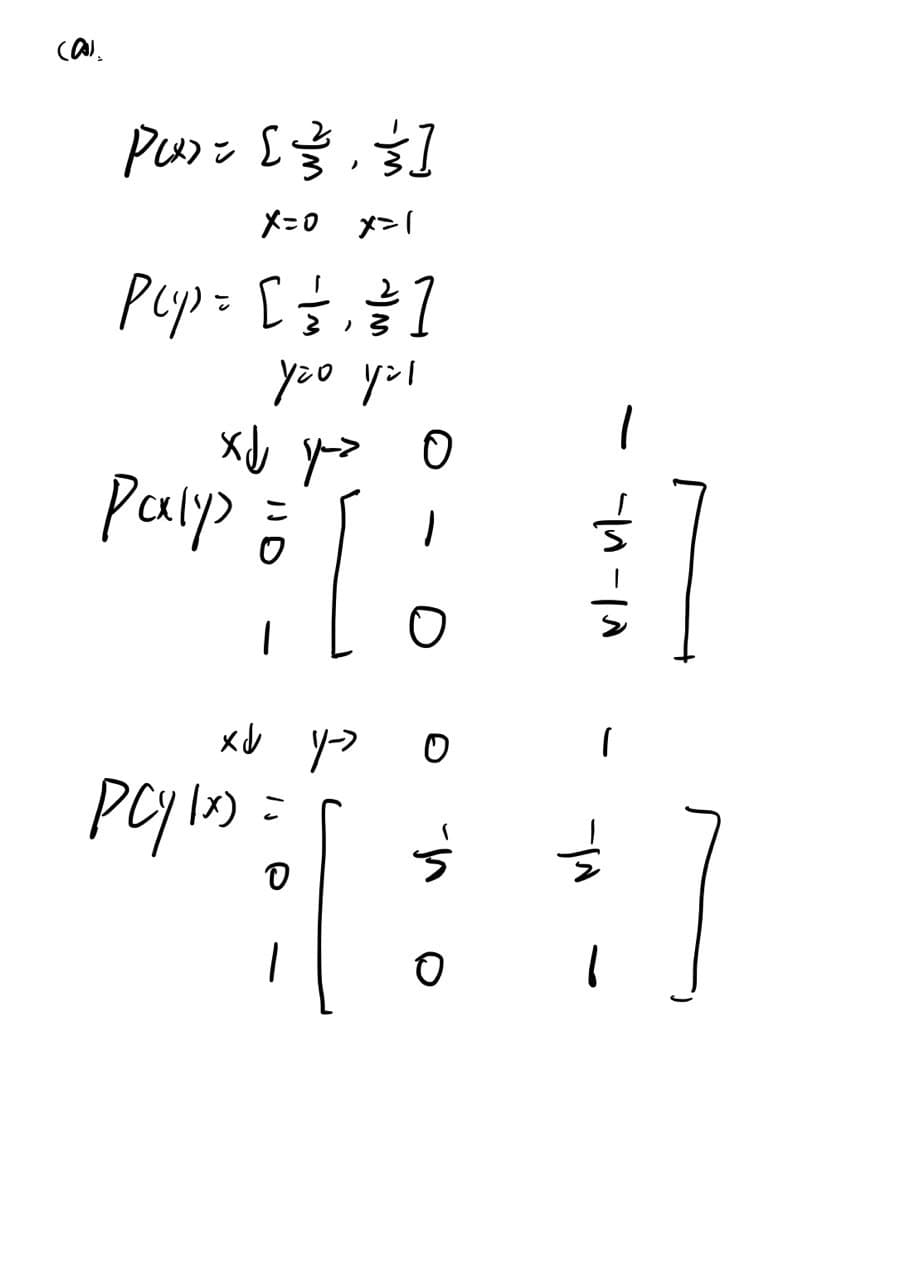

##(b)

In [ ]:
x1 = np.linspace(0,50,num=100)
x2 = np.linspace(0,50,num=100)
xx1,xx2 = np.meshgrid(x1,x2)

In [ ]:
xx1_, xx2_ = xx1.ravel(), xx2.ravel()

In [ ]:
zz = np.ones((100,100))
# zz_ = zz.ravel()

In [ ]:
zz[np.logical_and.reduce((xx1>25,xx2<15) )] = 1
zz[np.logical_and.reduce((xx1>25,xx2>=15) )] = 2
zz[np.logical_and.reduce((xx1<=25,xx2>15, xx1<5) )] = 3
zz[np.logical_and.reduce((xx1<=25,xx2>15, xx1>=5) )] = 4
zz[np.logical_and.reduce((xx1<=25,xx2<=15, xx1>10) )] = 5
zz[np.logical_and.reduce((xx1<=25,xx2<=15, xx1<=10, xx2<5) )] = 6
zz[np.logical_and.reduce((xx1<=25,xx2<=15, xx1<=10, xx2>=5) )] =7
zz_ = zz.ravel()



Text(0, 0.5, 'x2')

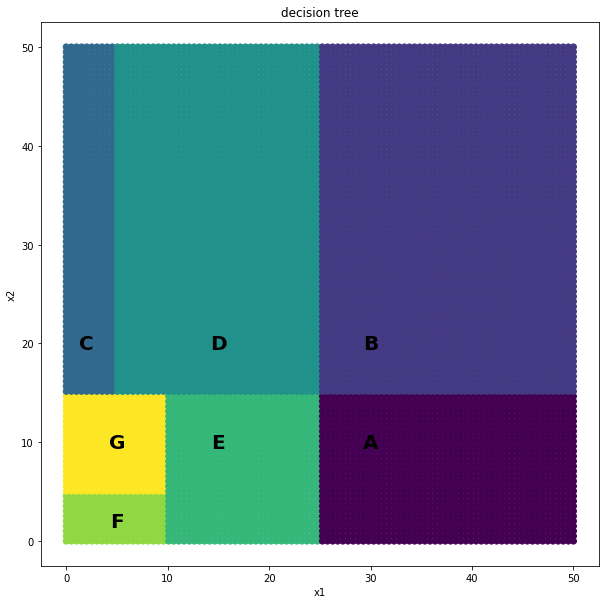

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xx1,xx2,c=zz )
# ax.contour(xx1,xx2,zz,20,cmap='RdGy', linewidths = 4)
# labels = {'A': (30,10),
#           'B': (30,20),
#           'C': (2,20),
#           'D': (15,20),
#           'E': (15,10),
#           'F': (5,2),
#           'G': (5,10)
#           }
label = ['A','B','C','D','E','F','G']
xy = [(30,10),(30,20),(2,20),(15,20),(15,10),(5,2),(5,10)]
for i in range(7):
  ax.annotate(label[i],xy[i],horizontalalignment='center',verticalalignment='center',size=20, weight='bold') 
ax.set_title('decision tree')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
# plt.contour(X, Y, Z, 20, cmap='RdGy');


##(f)


#Q3

##(a)

In [ ]:
X = np.array([[0,0,0],
             [0,0,1],
             [0,1,0],
             [0,1,1],
             [1,0,1],
             [1,0,1],
             [1,1,0],
             [1,1,0]])
Y = np.array([0,0,1,1,1,1,0,0])

In [ ]:
printshape('X',X)
printshape('Y',Y)

X.shape (8, 3)
Y.shape (8,)


In [ ]:
gini_lst = []
for i in range(X.shape[1]):
  # print(i)

  Y1 = Y[np.where(X[:,i]==0)]
  Y2 = Y[np.where(X[:,i]==1)]
  # printvalue('Y1',Y1)
  # printvalue('Y2',Y2)

  gini1 = 1
  # print(np.where(Y1==0))
  gini1-= (len(np.where(Y1==0)[0])/len(Y1))**2
  # printvalue('gini1',gini1)
  gini1-= (len(np.where(Y1==1)[0])/len(Y1))**2
  # printvalue('gini1',gini1)
  gini2 = 1
  gini2-= (len(np.where(Y2==0)[0])/len(Y2))**2
  # printvalue('gini2',gini2)

  gini2-= (len(np.where(Y2==1)[0])/len(Y2))**2
  # printvalue('gini1',gini1)
  # printvalue('gini2',gini2)
  # print(gini1*len(Y1)+gini2*len(Y2))
  gini_lst.append((gini1*len(Y1)+gini2*len(Y2))/X.shape[0])
  

In [ ]:
print(gini_lst)

[0.5, 0.5, 0.375]


Since the 3rd attribute bring the lowest gini impurity value, so we will pick the third attribute X_3 for the root of the decision tree.

##(b)

We can use three criteria to decide when to stop. 
1. The subset of training examples have the same output
2. The subset of training examples have the same values for all input attributes
3. There are no training examples for a particular leaf node

##(c)
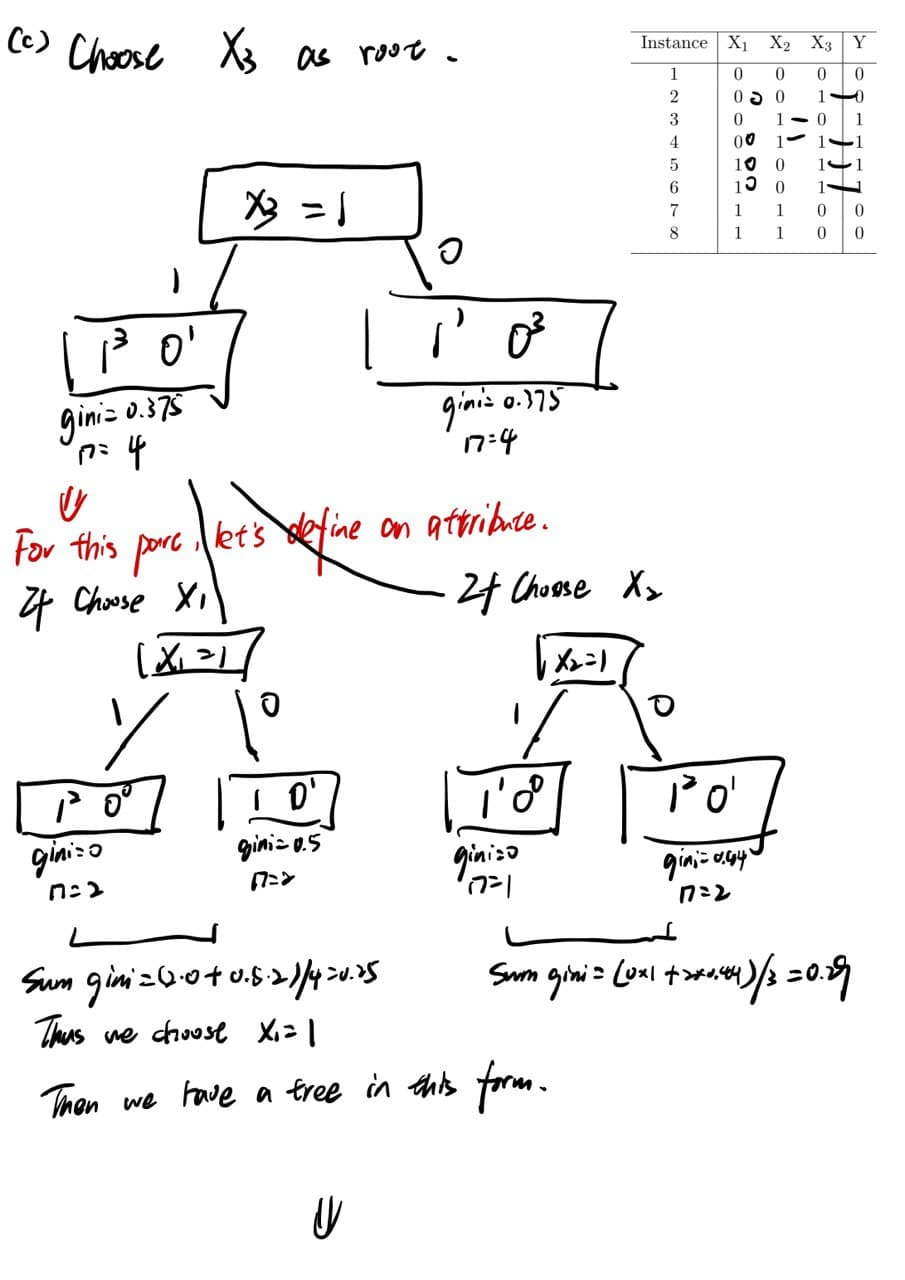
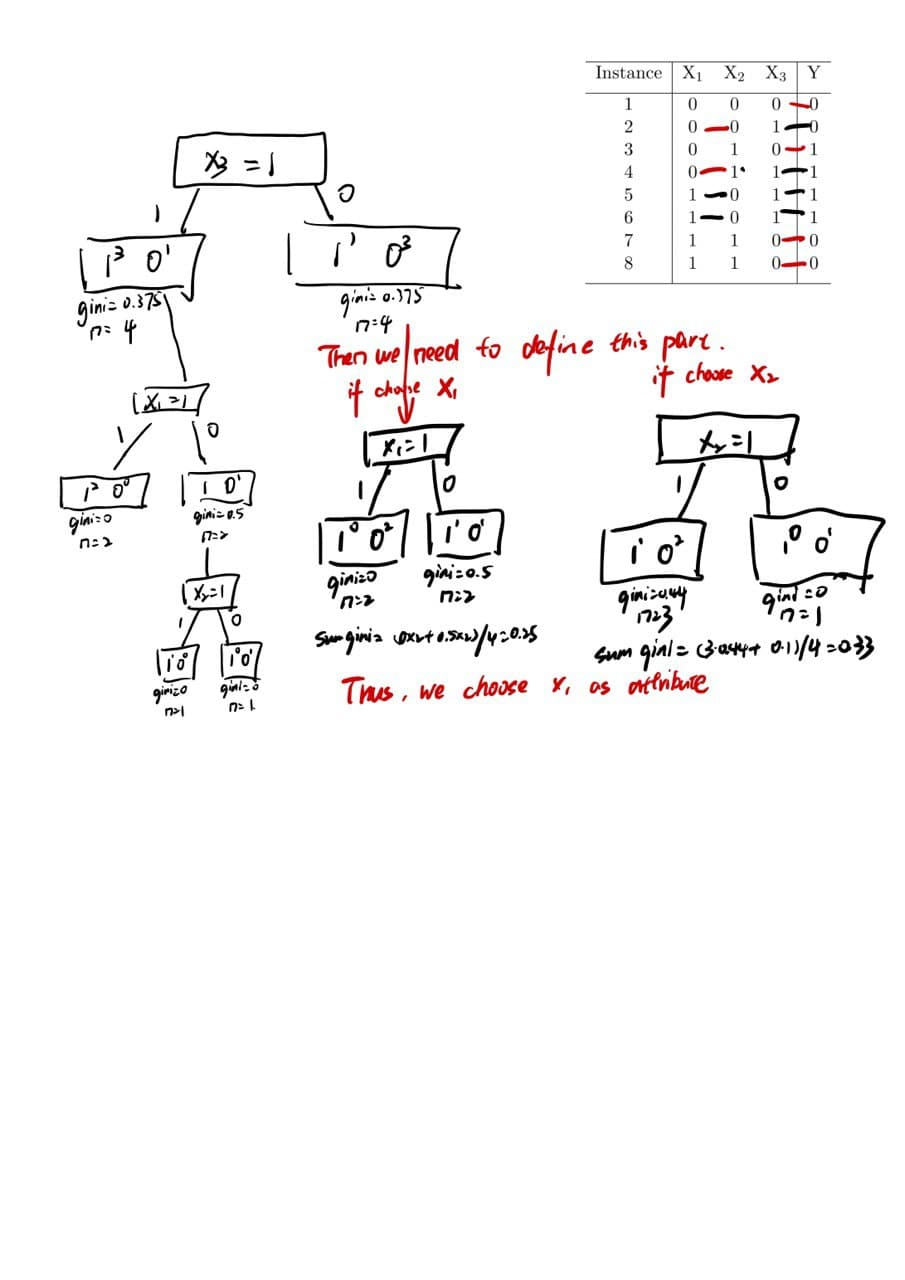
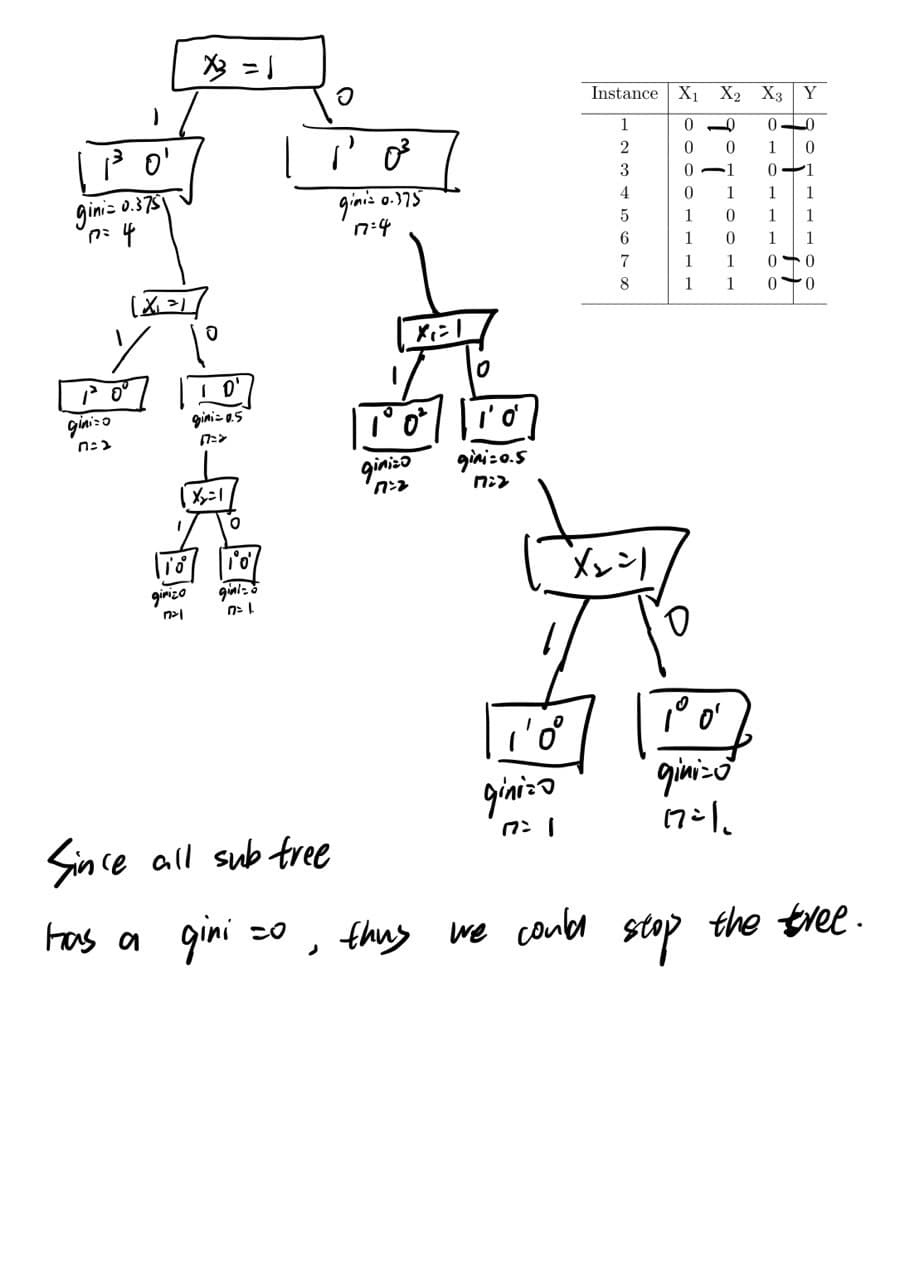

##(d)
for instance 9: x1 = 1, x2 = 1, x3 =1; the decision through the decision tree is 1.

for instance 10: x1 = 1, x2 = 0, x3 =0; the decision through the decision tree is 0.

for instance 11: x1 = 0, x2 = 1, x3 =1; the decision through the decision tree is 1.

##(e)
We could use the attributes of our decision tree and validation data to evaluate the overfitting problem. Tree size is an attribute which could help, our tress depth is 3 and it's equal to the feature numbers. This is reasonable. Also gini impurity is one way to evaluate our tree, our gini impurity on the bottom leaf are all zero, which could perform good classification but may be one cause of impurity, since too clear classification might be too precise. To combat overfitting, we could set constraints for the tree size and gini impurity threshold.

##(f)
Yes, the structure will change since the final leaf gini impurity is zero and that means that in the trainning data we can reach perfect classification, so if the two training labels changed, the structure will surely change.

After calculate the gini impurity of the first root, the X2 give the lowest gini impurity and should be the new root of the tree. So if we use the new lable, we would need to change the strture from the root. Thus, the final leaf node will also change since they used to be able to perfectly classify the train data.

##(g)

First we choose X3 as the root attribute. 

[Text(0.5555555555555556, 0.875, 'X[2] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2222222222222222, 0.375, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.625, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

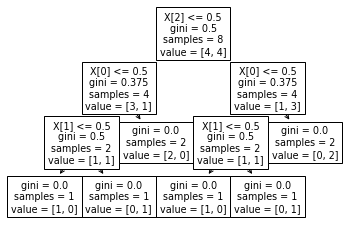

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, Y)
sklearn.tree.plot_tree(clf)

#Q4

##(a)

In [ ]:
def cal_gini(lst):
  gini =1
  n = len(lst)
  total = sum(lst)
  for idx, i in enumerate(lst):
    gini -= (i/total)**2
  return gini

In [ ]:
lst = [6,10,10,2,3]
gini = cal_gini(lst)

In [ ]:
print(f"gini {gini}")

gini 0.7408949011446411


Given the calculation, the gini impurity is 0.74 which is close to 1 and could prove that this data is not homogeneous and needs to be classified.

##(b)
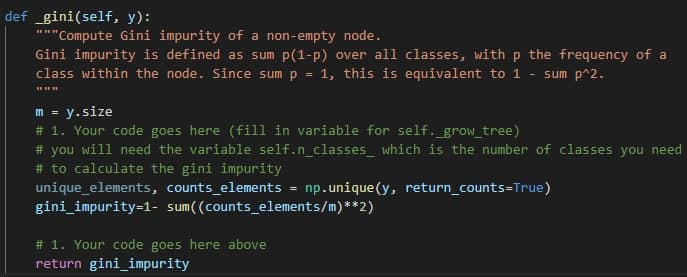

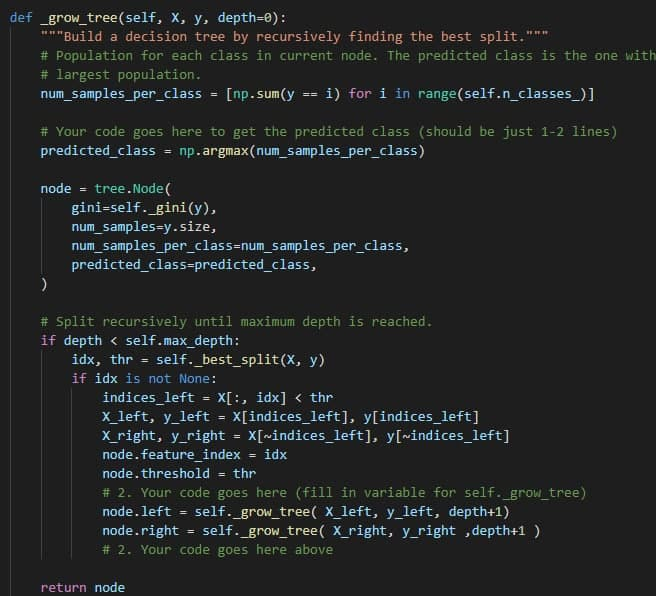

##(c)


In [ ]:
! python cart.py --dataset="iris" --max_depth=2 --hide_details

Input: [0, 0, 3.0, 2.5]
Prediction: virginica
          ┌──────────────────────────┐                                                      
     ┌────┤ petal length (cm) < 2.45 ├───────────────────────────┐                          
     │    └──────────────────────────┘                           │                          
╔════╧═══╗                                          ┌────────────┴────────────┐             
║ setosa ║                                   ┌──────┤ petal width (cm) < 1.75 ├──────┐      
╚════════╝                                   │      └─────────────────────────┘      │      
                                      ╔══════╧═════╗                           ╔═════╧═════╗
                                      ║ versicolor ║                           ║ virginica ║
                                      ╚════════════╝                           ╚═══════════╝


In [ ]:
! python cart.py --dataset="iris" --max_depth=2 --hide_details --use_sklearn

Input: [0, 0, 3.0, 2.5]
Prediction: virginica
Done. To convert to PNG, run: dot -Tpng tree.dot -o tree.png


In [ ]:
! dot -Tpng tree.dot -o tree.png

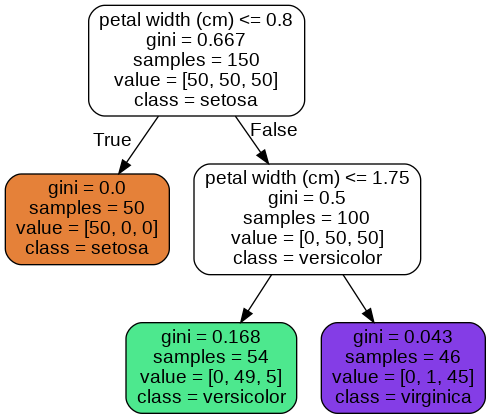

In [ ]:
! python cart.py --dataset="wifi" --max_depth=2 --hide_details

Input: [-70, 0, 0, 0, -40, 0, 33]
Prediction: Room 4
                                       ┌─────────────────┐                                       
                   ┌───────────────────┤ Wifi 1 < -54.50 ├───────────────────┐                   
                   │                   └─────────────────┘                   │                   
          ┌────────┴────────┐                                       ┌────────┴────────┐          
     ┌────┤ Wifi 5 < -59.50 ├─────┐                            ┌────┤ Wifi 1 < -44.50 ├─────┐    
     │    └─────────────────┘     │                            │    └─────────────────┘     │    
╔════╧═══╗                   ╔════╧═══╗                   ╔════╧═══╗                   ╔════╧═══╗
║ Room 1 ║                   ║ Room 4 ║                   ║ Room 3 ║                   ║ Room 2 ║
╚════════╝                   ╚════════╝                   ╚════════╝                   ╚════════╝


In [ ]:
! python cart.py --dataset="wifi" --max_depth=2 --use_sklearn

Input: [-70, 0, 0, 0, -40, 0, 33]
Prediction: Room 4
Done. To convert to PNG, run: dot -Tpng tree.dot -o tree.png


In [ ]:
! dot -Tpng tree.dot -o tree.png

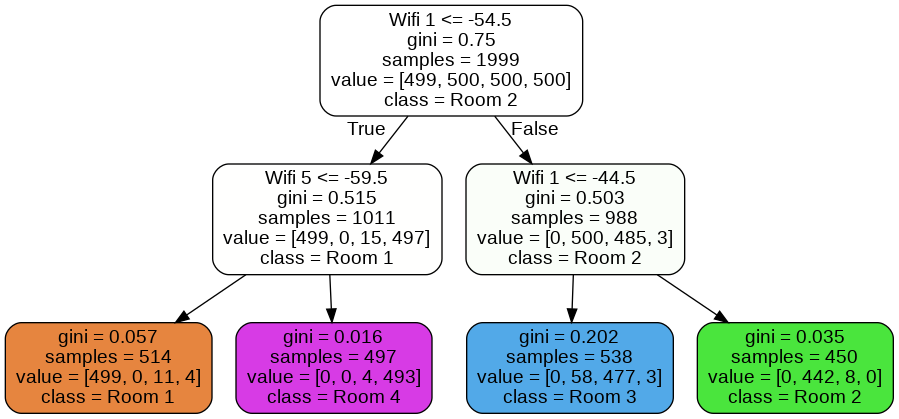